In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.manifold import TSNE

In [2]:
data = pd.read_csv('weather_dataset.csv')
print(data.head(10))

   temp  rhum    pres  coco  year  month  day  hour        city  longitude  \
0  21.7  28.0  1016.0   2.0  2020      1    1     0  Tijuana_MX  -117.0382   
1  14.4  57.0  1016.7   2.0  2020      1    1     1  Tijuana_MX  -117.0382   
2  15.0  55.0  1017.3   2.0  2020      1    1     2  Tijuana_MX  -117.0382   
3  13.9  59.0  1017.7   2.0  2020      1    1     3  Tijuana_MX  -117.0382   
4  13.3  47.0  1018.0   2.0  2020      1    1     4  Tijuana_MX  -117.0382   
5  12.2  47.0  1018.7   2.0  2020      1    1     5  Tijuana_MX  -117.0382   
6  11.1  50.0  1019.0   2.0  2020      1    1     6  Tijuana_MX  -117.0382   
7  11.1  50.0  1019.0   1.0  2020      1    1     7  Tijuana_MX  -117.0382   
8  11.7  44.0  1019.0   1.0  2020      1    1     8  Tijuana_MX  -117.0382   
9   7.2  65.0  1018.7   7.0  2020      1    1     9  Tijuana_MX  -117.0382   

   latitude weather_label  
0   32.5149         Clear  
1   32.5149         Clear  
2   32.5149         Clear  
3   32.5149         Clear  
4

In [3]:
digit_data = data.select_dtypes(include=[np.number])
print(digit_data.describe())

                temp           rhum           pres           coco  \
count  327832.000000  327832.000000  327832.000000  327832.000000   
mean       16.105287      72.313105    1014.103111       4.065924   
std         9.038996      18.355495       8.714041       4.455387   
min       -24.800000       2.000000     902.100000       1.000000   
25%         9.700000      61.000000    1009.600000       2.000000   
50%        16.500000      76.000000    1014.200000       3.000000   
75%        23.000000      87.000000    1019.200000       4.000000   
max        44.000000     100.000000    1050.100000      27.000000   

                year          month            day           hour  \
count  327832.000000  327832.000000  327832.000000  327832.000000   
mean     2021.491758       6.536403      15.805821      11.558082   
std         1.122050       3.407865       8.788607       6.948340   
min      2020.000000       1.000000       1.000000       0.000000   
25%      2020.000000       4.0000

Text(0.5, 1.0, 'Correlation Matrix of Weather Dataset')

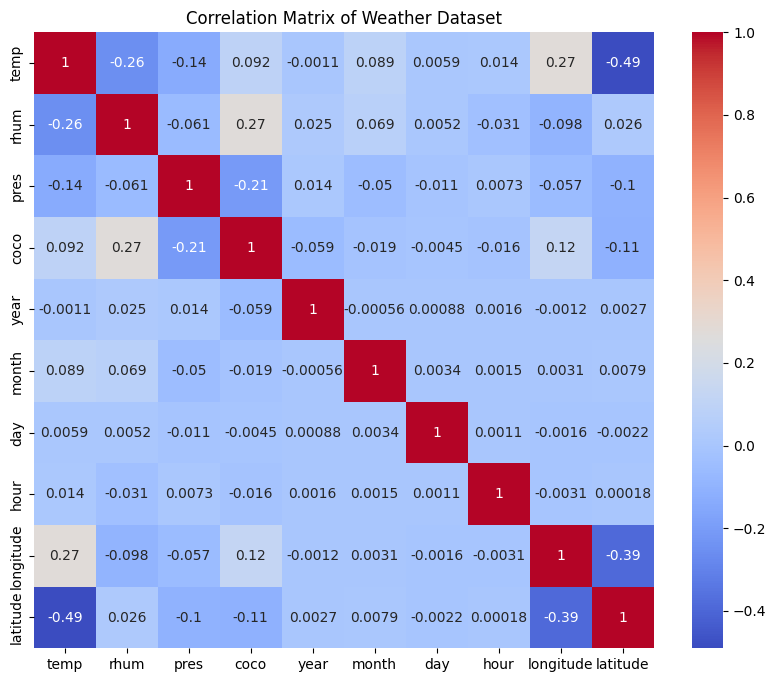

In [4]:
corr = digit_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Weather Dataset')

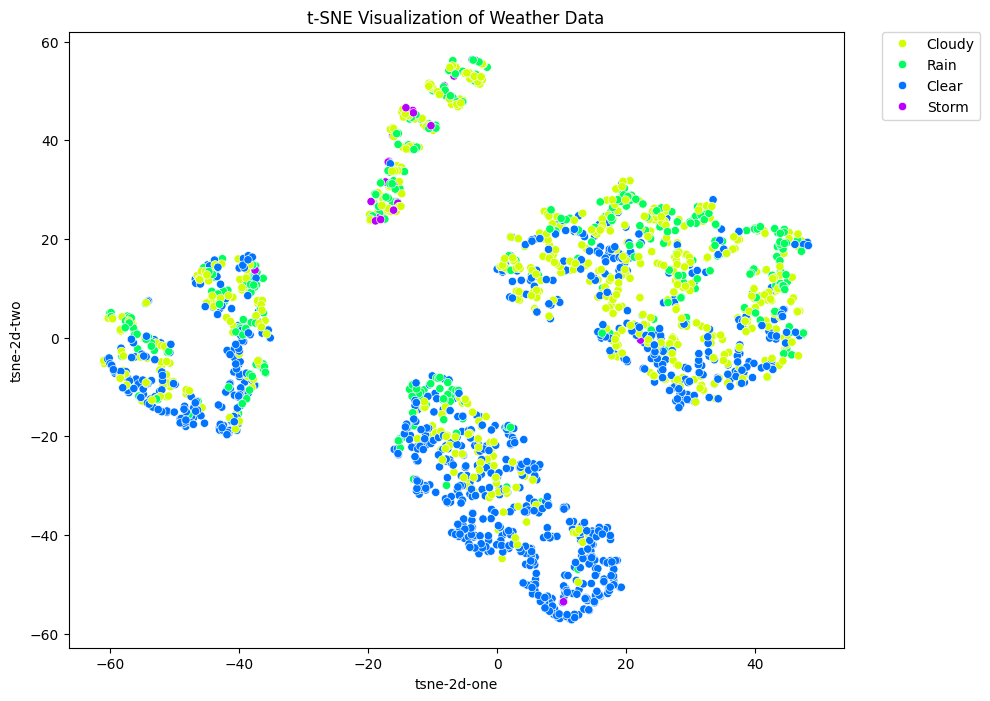

In [5]:
data_sampled = data.sample(n=2000, random_state=42)

features = ['temp', 'rhum', 'pres', 'latitude', 'month']
X = data_sampled[features]

tsne = TSNE(n_components=2, random_state=42)
X_embedded = tsne.fit_transform(X)

data_sampled['tsne-2d-one'] = X_embedded[:, 0]
data_sampled['tsne-2d-two'] = X_embedded[:, 1]

plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='tsne-2d-one', y='tsne-2d-two',
    hue='weather_label',
    palette=sns.color_palette('hsv', len(data['weather_label'].unique())),
    data=data_sampled
)
plt.title('t-SNE Visualization of Weather Data')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

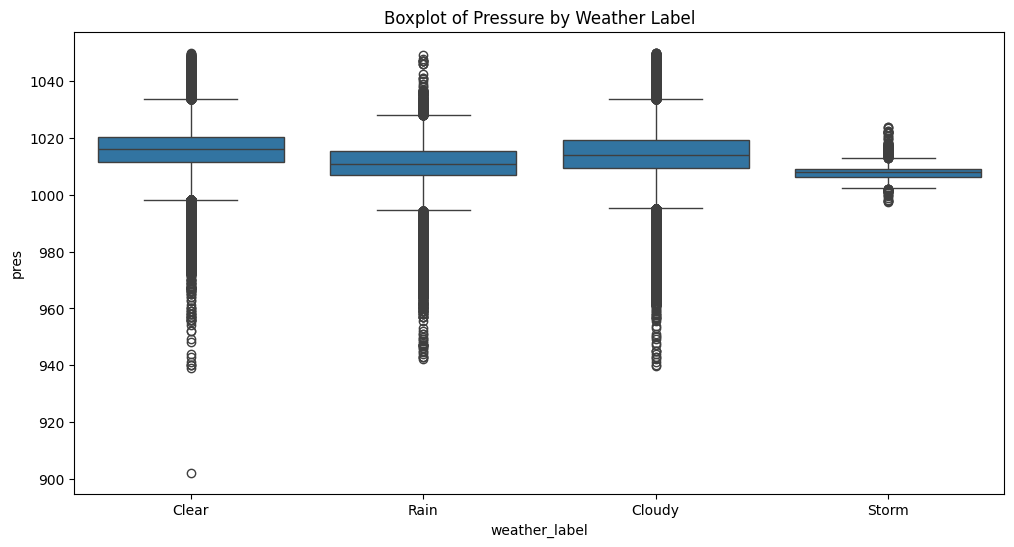

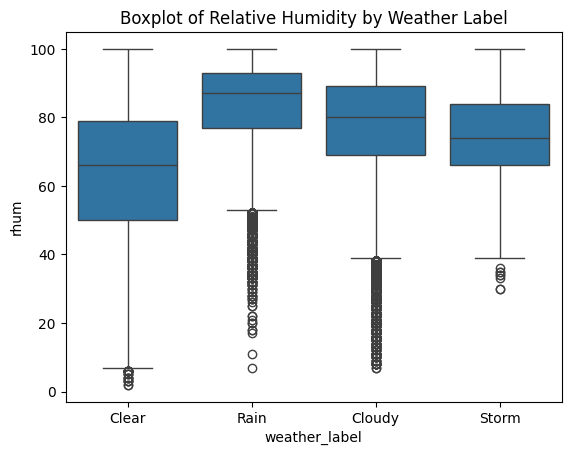

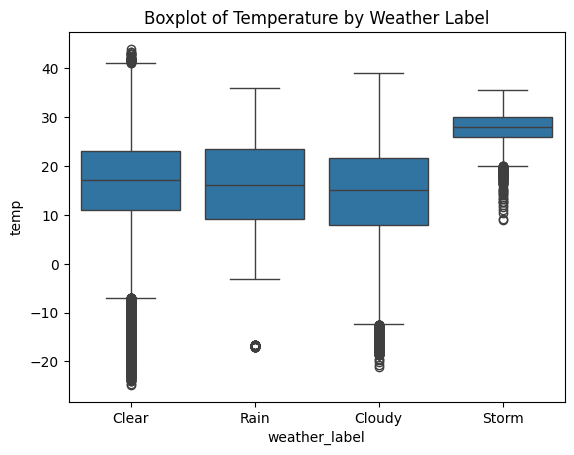

In [6]:
plt.figure(figsize=(12, 6))

sns.boxplot(x='weather_label', y='pres', data=data)
plt.title('Boxplot of Pressure by Weather Label')
plt.show()

sns.boxplot(x='weather_label', y='rhum', data=data)
plt.title('Boxplot of Relative Humidity by Weather Label')
plt.show()

sns.boxplot(x='weather_label', y='temp', data=data)
plt.title('Boxplot of Temperature by Weather Label')
plt.show()

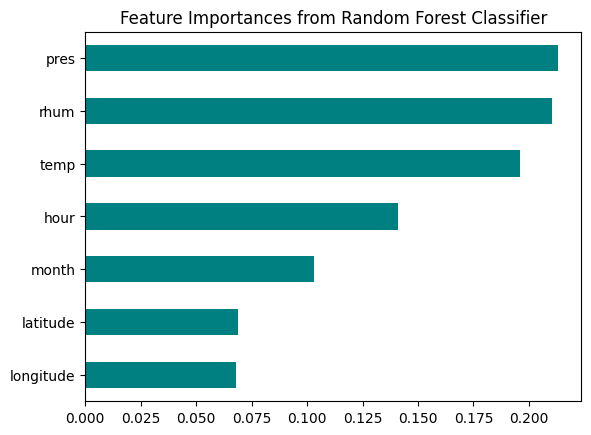

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Preparar datos
le = LabelEncoder()
y = le.fit_transform(data['weather_label']) # Convertir texto a números
X = data[['temp', 'rhum', 'pres', 'latitude', 'longitude', 'month', 'hour']]

# Entrenar modelo rápido
model = RandomForestClassifier()
model.fit(X, y)

# Graficar importancia
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', color='teal')
plt.title('Feature Importances from Random Forest Classifier')
plt.show()

--- Original distribution ---
weather_label
Clear     154130
Cloudy    110094
Rain       60388
Storm       3220
Name: count, dtype: int64


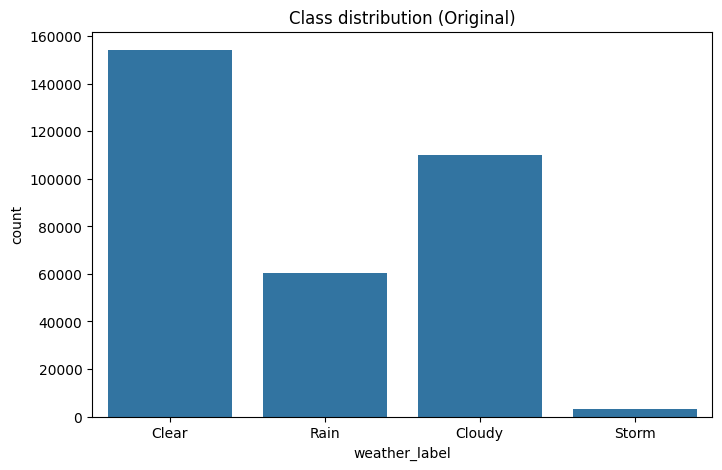

Index(['temp', 'rhum', 'pres', 'coco', 'year', 'month', 'day', 'hour',
       'longitude', 'latitude'],
      dtype='object')

Original train shape: (262265, 10)
Class count in the training sample: Counter({np.int64(0): 123304, np.int64(1): 88075, np.int64(2): 48310, np.int64(3): 2576})

--- Distribution after smote (Train) ---
Resampled dimensions: (493216, 10)
Class count Resampled train: Counter({np.int64(2): 123304, np.int64(1): 123304, np.int64(0): 123304, np.int64(3): 123304})


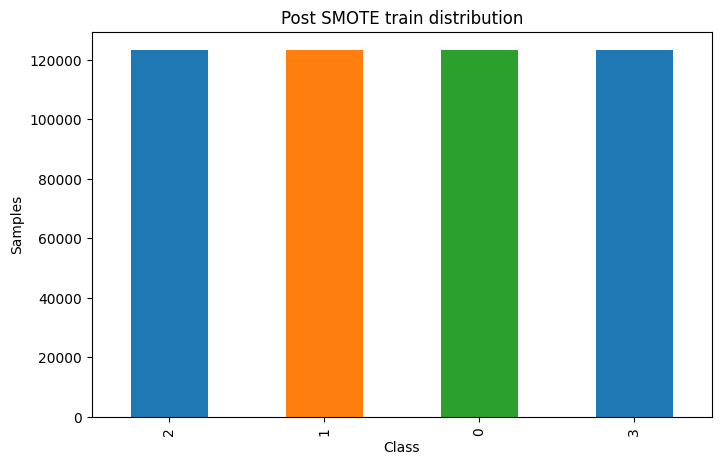

In [13]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
df = data.copy()

print("--- Original distribution ---")
print(df['weather_label'].value_counts())

# Quick visualization of original class distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='weather_label', data=df)
plt.title('Class distribution (Original)')
plt.show()

# Separate features and target
X = df.drop(['weather_label','city'], axis=1)
print(X.columns)
y = df['weather_label']
y = le.fit_transform(df['weather_label']) 

# Divide on train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nOriginal train shape: {X_train.shape}")
print(f"Class count in the training sample: {Counter(y_train)}")

# Apply SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Results after SMOTE
print("\n--- Distribution after smote (Train) ---")
print(f"Resampled dimensions: {X_train_resampled.shape}")
print(f"Class count Resampled train: {Counter(y_train_resampled)}")

# Quick visualization of resampled class distribution
plt.figure(figsize=(8, 5))
pd.Series(y_train_resampled).value_counts().plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title('Post SMOTE train distribution')
plt.xlabel('Class')
plt.ylabel('Samples')
plt.show()